## 3 (a)Weather dataset: Use dummy values for training, refer tutorial. For testing also, use dummy values as per tutorial.

In [1]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [2]:
#Label Encoder
from sklearn import preprocessing
#creating label encoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded = le.fit_transform(weather)
weather_encoded

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1])

In [3]:
#Similarly converting temp an d play into numbers
temp_encoded = le.fit_transform(temp)
label = le.fit_transform(play)

print (temp_encoded)
print (label)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
#Combining weather and temp into single list of tuples
features = zip(weather_encoded, temp_encoded) #to map the similar index of multiple containers so
#that they can be used just using as single entity
features_list = list(features)# zip in python3 returns an iterator. Iterators can only be exhausted (by something like making a list out of them) once. The purpose of this is to save memory by only 
print (features_list)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [5]:
#Generate a model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features_list, label)

#Presict value
predicted = model.predict([[0,2]])#Doubt
print (predicted)

[1]


## 3(b) Wine dataset: https://archive.ics.uci.edu/ml/datasets/wine, refer tutorial. Find accuracy of the model.

In [6]:
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

#Features
print("features: ",wine.feature_names)

#Labels
print("labels: ",wine.target_names)

features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
labels:  ['class_0' 'class_1' 'class_2']


In [7]:
#Exploring data
print(wine.data.shape)

#print top 5 records
print(wine.data[0:5])

#print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print (wine.target)

(178, 13)
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2

In [8]:
#SPlitting the dataset
from sklearn.model_selection import train_test_split #train_test_split is now in model_selection

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109)
#This is to check and validate the data when running the code multiple times. Setting random_state a fixed
#value will guarantee that same sequence of random numbers are generated each time you run the code.

In [9]:
#Model Generation
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

In [10]:
#Accuracy Calculation
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_pred,y_test))

Accuracy 0.9074074074074074


### For 3(b), run naive bayes for different configurations of train:test split, namely 50:50, 60:40, 70:30, 80:20 and 90:10. For each configuration, compute precision and recall values (both expressed as percentage). Use matplotlib to draw bar plots (in single plot) for precision & recall for each configuration. On X-axis, write configurations and on Y-axis is percentage to represent precision and recall. Use red bar for precision and blue bar for recall. (Refer: https://matplotlib.org/gallery/statistics/barchart_demo.html)

In [11]:
#https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
# 50:50
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.5,random_state=109)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
pre_50 = metrics.precision_score(y_test,y_pred,average = 'macro')# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
re_50 = metrics.recall_score(y_test,y_pred,average = 'macro')
print("Precision: ",pre_50)
print("Recall: ",re_50)

Precision:  0.9543266769073222
Recall:  0.957997311827957


In [12]:
# 60:40
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.4,random_state=109)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
pre_40 = metrics.precision_score(y_test,y_pred,average = 'macro')# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
re_40 = metrics.recall_score(y_test,y_pred,average = 'macro')
print("Precision: ",pre_40)
print("Recall: ",re_40)

Precision:  0.9310628019323671
Recall:  0.93482905982906


In [13]:
# 70:30
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
pre_30 = metrics.precision_score(y_test,y_pred,average = 'macro')# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
re_30 = metrics.recall_score(y_test,y_pred,average = 'macro')
#print(re_30)
print("Precision: ",pre_30)
print("Recall: ",re_30)

Precision:  0.9071969696969697
Recall:  0.9139515455304928


In [14]:
# 80:20
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2,random_state=109)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
pre_20 = metrics.precision_score(y_test,y_pred,average = 'macro')# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
re_20 = metrics.recall_score(y_test,y_pred,average = 'macro')
print("Precision: ",pre_20)
print("Recall: ",re_20)

Precision:  0.9259259259259259
Recall:  0.9583333333333334


In [15]:
# 90:10
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1,random_state=109)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
pre_10 = metrics.precision_score(y_test,y_pred,average = 'macro')# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
re_10 = metrics.recall_score(y_test,y_pred,average = 'macro')
print("Precision: ",pre_10)
print("Recall: ",re_10)

Precision:  0.875
Recall:  0.9107142857142857


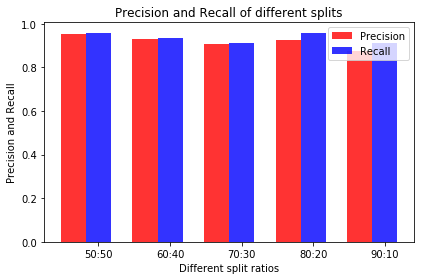

In [17]:
import numpy as np
import matplotlib.pyplot as plt

n_groups = 5
precisions = (pre_50, pre_40, pre_30, pre_20, pre_10)#tuple(immutable Python objects)
recalls = (re_50, re_40, re_30, re_20, re_10)#tuple

fig,ax = plt.subplots()#creates one figure with one subplot
index = np.arange(n_groups)#for labels on X-axis and number of subplots(values between 0 and 1)
bar_width = 0.35
opacity = 0.8

#plt.bar(x,height,bar_width)
plt.bar(index,precisions,bar_width,alpha=opacity,color='r',label='Precision')
plt.bar(index+bar_width,recalls,bar_width,alpha=opacity,color='b',label='Recall')
#both the subplots have no labels on X-axis or Y-axis
#index_bar_width to distinct subplots in a group

plt.xlabel('Different split ratios')
plt.ylabel('Precision and Recall')
plt.title('Precision and Recall of different splits')
#No labels till now for subplots

plt.xticks(index+bar_width,('50:50','60:40','70:30','80:20','90:10'))
# xticks()-Get or set the current tick locations and labels of the x-axis.
#xticks(ticks, [labels], **kwargs)  # Set locations and labels

plt.legend() #for showing what different colors represent

plt.tight_layout()
plt.show()
